In [1]:
# import sys
# import os
# sys.path.append(os.path.abspath('../VAE'))  # Adds the directory of 'script/VAE' to Python path
# from utils import *

# os.chdir('../..')
# print(os.getcwd())

# data_path = './data/PAS Challenge HR Data.xlsx'  
# _, _, df_scaled, df = prepare_data(data_path)

In [1]:
import os
import pandas as pd

os.chdir('../..')
print(os.getcwd())

df_org = pd.read_csv('./data/HR_events.csv')
df_org.head()

/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns


/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,VitalID,VitalTime,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,300,event_description
0,1007,2211370,157,158,158,158,160,165,166,167,...,150,134,127,151,159,159,158,160,163,This is a heart rate time series from a NICU i...
1,1007,2268370,165,165,166,169,169,169,170,170,...,165,161,156,146,133,137,156,163,164,This is a heart rate time series from a NICU i...
2,1010,3796852,158,158,159,159,158,157,158,158,...,170,170,170,171,172,172,172,171,156,This is a heart rate time series from a NICU i...
3,1010,18931252,103,101,97,104,110,109,113,117,...,120,132,145,148,149,148,144,131,117,This is a heart rate time series from a NICU i...
4,1010,19165252,136,122,113,115,119,123,118,116,...,111,112,119,126,118,107,103,88,81,This is a heart rate time series from a NICU i...


In [3]:
df = df_org.loc[:, '1':'300'].copy()
df.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,157,158,158,158,160,165,166,167,166,167,...,156,150,134,127,151,159,159,158,160,163
1,165,165,166,169,169,169,170,170,170,169,...,166,165,161,156,146,133,137,156,163,164
2,158,158,159,159,158,157,158,158,158,159,...,170,170,170,170,171,172,172,172,171,156
3,103,101,97,104,110,109,113,117,116,117,...,116,120,132,145,148,149,148,144,131,117
4,136,122,113,115,119,123,118,116,116,114,...,110,111,112,119,126,118,107,103,88,81


In [6]:
# import numpy as np
# from tslearn.metrics import dtw, lcss
# from tqdm import tqdm
# from joblib import Parallel, delayed

# def calculate_distances_loop(df):
#     n_rows = len(df)
#     dtw_matrix = np.zeros((n_rows, n_rows))
#     lcss_matrix = np.zeros((n_rows, n_rows))
    
#     # Process each row against all other rows
#     for i in tqdm(range(n_rows)):
#         series1 = df.iloc[i].values
#         for j in range(i+1, n_rows):
#             series2 = df.iloc[j].values
#             dtw_dist = dtw(series1, series2)
#             lcss_dist = lcss(series1, series2)
            
#             # Fill both sides of the symmetric matrices
#             dtw_matrix[i,j] = dtw_matrix[j,i] = dtw_dist
#             lcss_matrix[i,j] = lcss_matrix[j,i] = lcss_dist
    
#     return dtw_matrix, lcss_matrix



# def process_batch(i, df):
#     n_rows = len(df)
#     series1 = df.iloc[i].values
#     dtw_row = np.zeros(n_rows)
#     lcss_row = np.zeros(n_rows)
    
#     for j in range(i+1, n_rows):
#         series2 = df.iloc[j].values
#         dtw_row[j] = dtw(series1, series2)
#         lcss_row[j] = lcss(series1, series2)
    
#     return i, dtw_row, lcss_row

# def calculate_distances_parallel(df, n_jobs=10):
#     n_rows = len(df)
#     dtw_matrix = np.zeros((n_rows, n_rows))
#     lcss_matrix = np.zeros((n_rows, n_rows))
    
#     # Process all rows in parallel
#     results = Parallel(n_jobs=n_jobs)(
#         delayed(process_batch)(i, df) for i in tqdm(range(n_rows))
#     )
    
#     # Fill the matrices (making them symmetric)
#     for i, dtw_row, lcss_row in results:
#         for j in range(i+1, n_rows):
#             dtw_matrix[i,j] = dtw_matrix[j,i] = dtw_row[j]
#             lcss_matrix[i,j] = lcss_matrix[j,i] = lcss_row[j]
    
#     return dtw_matrix, lcss_matrix

In [7]:
# import time
# start_time = time.time()
# df_top10 = df.iloc[:500,]

# # Example usage
# if __name__ == '__main__':
    
#     # Calculate distances
#     dtw_matrix, lcss_matrix = calculate_distances_parallel(df_top10, n_jobs=10)
    
#     # Optional: Save results
#     np.save('./script/WSDIST/results/dtw_matrix.npy', dtw_matrix)
#     np.save('./script/WSDIST/results/lcss_matrix.npy', lcss_matrix)
    
#     # Optional: Check results
#     print("DTW matrix shape:", dtw_matrix.shape)
#     print("LCSS matrix shape:", lcss_matrix.shape)

# end_time = time.time()
# execution_time = end_time - start_time
# print(f"Execution time: {execution_time:.2f} seconds")


# # # time the looping code
# # start_time = time.time()
# # dtw_distances, lcss_distances = calculate_distances_loop(df_top10)
# # end_time = time.time()
# # execution_time = end_time - start_time
# # print(f"Execution time: {execution_time:.2f} seconds")

# sampling based distances

In [9]:
import numpy as np
import pandas as pd
from tslearn.metrics import dtw, lcss
from joblib import Parallel, delayed
from tqdm import tqdm
import gc

def process_batch(i, df, sample_size=1000, by = 'dtw'):
    n_rows = len(df)
    series1 = df.iloc[i].values
    
    # Sample indices (excluding index i)
    available_indices = list(set(range(n_rows)) - {i})
    if len(available_indices) > sample_size:
        sampled_indices = np.random.choice(available_indices, sample_size, replace=False)
    else:
        sampled_indices = available_indices
    
    # Calculate distances for sampled indices
    distances = []
    for j in sampled_indices:
        series2 = df.iloc[j].values
        if by == 'dtw':
            dist = dtw(series1, series2)  # or use lcss if preferred
        elif by == 'lcss':
            dist = lcss(series1, series2)
        distances.append((j, dist))
    
    # Get top 3 furthest indices
    top_3_indices = sorted(distances, key=lambda x: x[1], reverse=True)[:3]
    top_indices = [idx for idx, _ in top_3_indices]
    
    # Free memory
    del series1, distances
    gc.collect()
    
    return i, top_indices

def find_furthest_neighbors(df, n_jobs=10, sample_size=1000, by = 'dtw'):
    n_rows = len(df)
    
    # Process all rows in parallel
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_batch)(i, df, sample_size, by) for i in tqdm(range(n_rows))
    )
    
    # Organize results into a dictionary
    furthest_neighbors = {i: top_3 for i, top_3 in results}
    
    return furthest_neighbors


In [11]:

# # Usage example
# if __name__ == '__main__':
#     for by in ['dtw','lcss']:
#         # Find furthest neighbors
#         furthest3 = find_furthest_neighbors(df, n_jobs=10, sample_size=df.shape[0], by = by)
#         # save the furthest_neighbors
#         np.save('./script/WSDIST/results/'+by+'_furthest3_'+str(df.shape[0])+'.npy', furthest3)


/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/joyqiu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

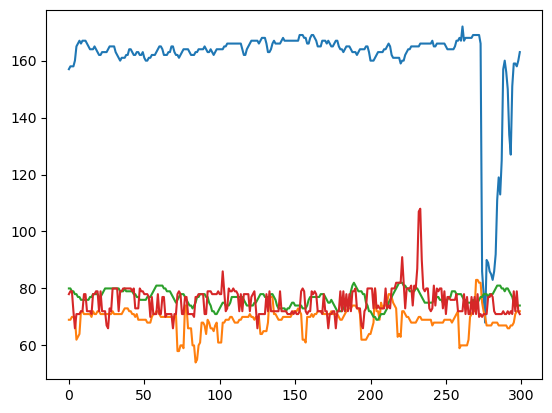

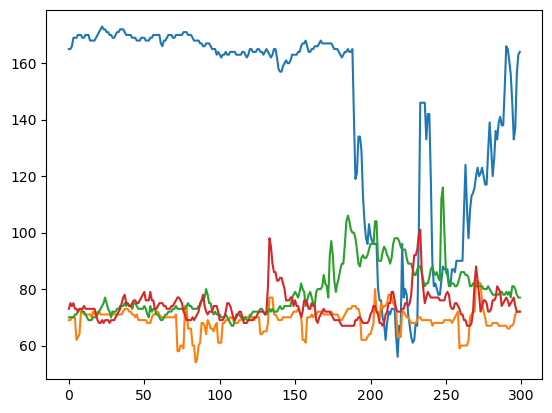

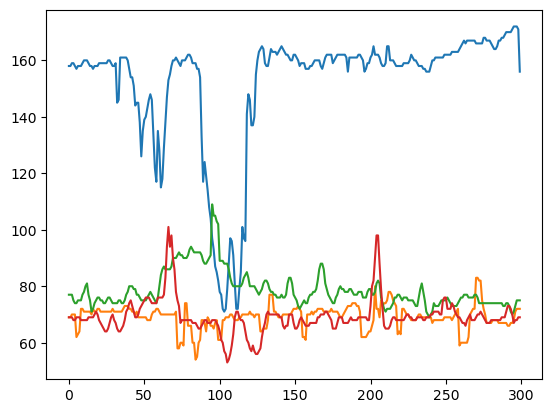

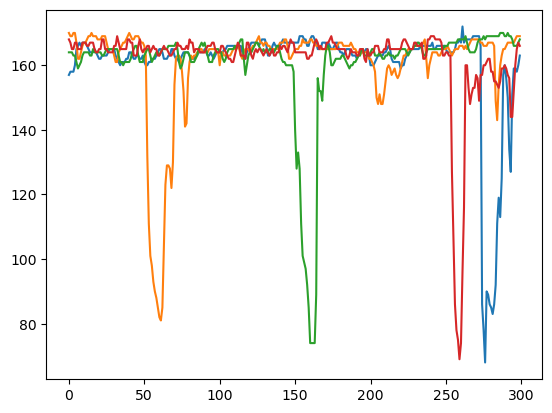

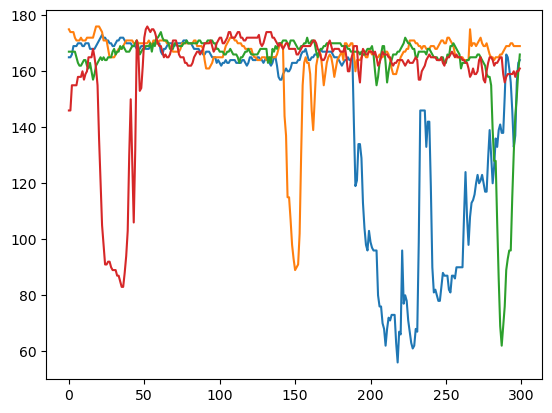

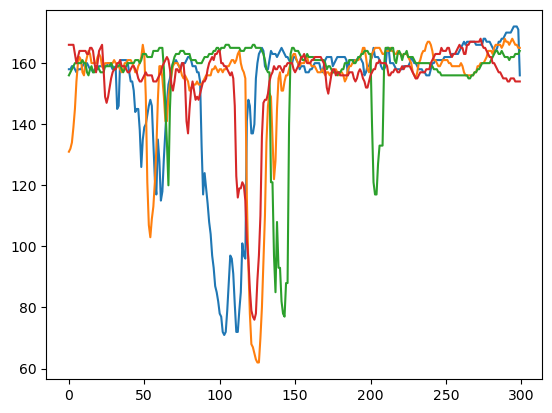

In [12]:

import matplotlib.pyplot as plt
# load the furthest_neighbors
dtw_furthest3 = np.load('./script/WSDIST/results/dtw_furthest3_'+str(df.shape[0])+'.npy', allow_pickle=True)
lcss_furthest3 = np.load('./script/WSDIST/results/lcss_furthest3_'+str(df.shape[0])+'.npy', allow_pickle=True)

for i in range(3):
    # plot the time series of the original row
    plt.plot(df.iloc[i].values)
    # plot the time series of the furthest neighbors
    plt.plot(df.iloc[dtw_furthest3.item()[i][0]].values)
    plt.plot(df.iloc[dtw_furthest3.item()[i][1]].values)
    plt.plot(df.iloc[dtw_furthest3.item()[i][2]].values)
    plt.show()

for i in range(3):
    # plot the time series of the original row
    plt.plot(df.iloc[i].values)
    # plot the time series of the furthest neighbors
    plt.plot(df.iloc[lcss_furthest3.item()[i][0]].values)
    plt.plot(df.iloc[lcss_furthest3.item()[i][1]].values)
    plt.plot(df.iloc[lcss_furthest3.item()[i][2]].values)
    plt.show()



In [17]:
# Convert to dataframe
data = []
furthest_dict = dtw_furthest3.item()
for i in furthest_dict.keys():
    data.append({
        'dtw_far_rowid1': dtw_furthest3.item()[i][0],
        'dtw_far_rowid2': dtw_furthest3.item()[i][1],
        'dtw_far_rowid3': dtw_furthest3.item()[i][2]
    })
    
df_dtw_furthest3 = pd.DataFrame(data)
# concat [df_dtw_furthest3 and df_org]
df_furthest3 = pd.concat([df_org, df_dtw_furthest3], axis=1)

# same for lcss
data = []
furthest_dict = lcss_furthest3.item()
for i in furthest_dict.keys():
    data.append({
        'lcss_far_rowid1': lcss_furthest3.item()[i][0],
        'lcss_far_rowid2': lcss_furthest3.item()[i][1],
        'lcss_far_rowid3': lcss_furthest3.item()[i][2]  
    })
    
df_lcss_furthest3 = pd.DataFrame(data)
# concat [df_lcss_furthest3 and df_org]
df_furthest3 = pd.concat([df_furthest3, df_lcss_furthest3], axis=1)
# # save the dataframe
# df_furthest3.to_csv('./data/HR_events_with_furthest3.csv', index=False)
# zip the dataframe
df_furthest3.to_csv('./data/HR_events_with_furthest3.csv.zip', index=False)



In [23]:
df_furthest3.VitalID.nunique()

882